In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
        
adult_data = pd.read_csv("adult_dataset.csv")
adult_data.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [117]:
print("# of people in original data:" + str(len(adult_data.index)))

# of people in original data:32561


<AxesSubplot:xlabel='age', ylabel='count'>

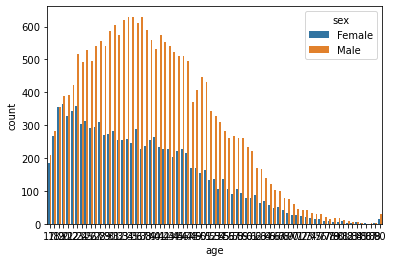

In [118]:
sns.countplot(x="age", hue="sex" , data=adult_data)

<AxesSubplot:ylabel='Frequency'>

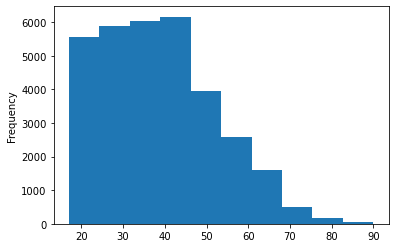

In [119]:
adult_data["age"].plot.hist()

In [120]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [121]:
adult_data.isnull()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [122]:
adult_data.head(20)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [123]:
adult_data.drop('capital.gain', axis=1, inplace=True)

In [124]:
adult_data.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,3004,60,?,>50K


In [125]:
sex = pd.get_dummies(adult_data['sex'], drop_first=True)
sex.head(5)

,Male
0,0
1,0
2,0
3,0
4,0


In [126]:
adult_data.replace(to_replace="Female", value=1, inplace=True)

In [127]:
adult_data.replace(to_replace="Male", value=0, inplace=True)

In [128]:
adult_data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,1,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,1,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,1,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,1,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,1,0,40,United-States,<=50K


In [129]:
from sklearn.preprocessing import LabelEncoder

Lab = LabelEncoder()

adult_data['education'] = Lab.fit_transform(adult_data['education'])


In [130]:
Lab.classes_

array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college'],
      dtype=object)

In [131]:
adult_data.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.loss,hours.per.week,native.country,income
0,90,?,77053,11,9,Widowed,?,Not-in-family,White,1,4356,40,United-States,<=50K
1,82,Private,132870,11,9,Widowed,Exec-managerial,Not-in-family,White,1,4356,18,United-States,<=50K
2,66,?,186061,15,10,Widowed,?,Unmarried,Black,1,4356,40,United-States,<=50K
3,54,Private,140359,5,4,Divorced,Machine-op-inspct,Unmarried,White,1,3900,40,United-States,<=50K
4,41,Private,264663,15,10,Separated,Prof-specialty,Own-child,White,1,3900,40,United-States,<=50K
5,34,Private,216864,11,9,Divorced,Other-service,Unmarried,White,1,3770,45,United-States,<=50K
6,38,Private,150601,0,6,Separated,Adm-clerical,Unmarried,White,0,3770,40,United-States,<=50K
7,74,State-gov,88638,10,16,Never-married,Prof-specialty,Other-relative,White,1,3683,20,United-States,>50K
8,68,Federal-gov,422013,11,9,Divorced,Prof-specialty,Not-in-family,White,1,3683,40,United-States,<=50K
9,41,Private,70037,15,10,Never-married,Craft-repair,Unmarried,White,0,3004,60,?,>50K


In [132]:
adult_data = adult_data[adult_data.workclass != '?']

In [133]:
adult_data = adult_data[adult_data.occupation != '?']

In [134]:
adult_data.head(15)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,11,9,Widowed,Exec-managerial,Not-in-family,White,1,4356,18,United-States,<=50K
3,54,Private,140359,5,4,Divorced,Machine-op-inspct,Unmarried,White,1,3900,40,United-States,<=50K
4,41,Private,264663,15,10,Separated,Prof-specialty,Own-child,White,1,3900,40,United-States,<=50K
5,34,Private,216864,11,9,Divorced,Other-service,Unmarried,White,1,3770,45,United-States,<=50K
6,38,Private,150601,0,6,Separated,Adm-clerical,Unmarried,White,0,3770,40,United-States,<=50K
7,74,State-gov,88638,10,16,Never-married,Prof-specialty,Other-relative,White,1,3683,20,United-States,>50K
8,68,Federal-gov,422013,11,9,Divorced,Prof-specialty,Not-in-family,White,1,3683,40,United-States,<=50K
9,41,Private,70037,15,10,Never-married,Craft-repair,Unmarried,White,0,3004,60,?,>50K
10,45,Private,172274,10,16,Divorced,Prof-specialty,Unmarried,Black,1,3004,35,United-States,>50K
11,38,Self-emp-not-inc,164526,14,15,Never-married,Prof-specialty,Not-in-family,White,0,2824,45,United-States,>50K


In [135]:
adult_data['workclass']

1        Private
3        Private
4        Private
5        Private
6        Private
          ...   
32556    Private
32557    Private
32558    Private
32559    Private
32560    Private
Name: workclass, Length: 30718, dtype: object

In [136]:
Lab_education = LabelEncoder()

adult_data['workclass'] = Lab_education.fit_transform(adult_data['workclass'])

In [137]:
Lab_education.classes_


array(['Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc',
       'Self-emp-not-inc', 'State-gov', 'Without-pay'], dtype=object)

In [138]:
Lab_marital = LabelEncoder()

adult_data['marital.status'] = Lab_marital.fit_transform(adult_data['marital.status'])

Lab_marital.classes_


array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
      dtype=object)

In [139]:
Lab_occupation = LabelEncoder()

adult_data['occupation'] = Lab_occupation.fit_transform(adult_data['occupation'])

Lab_occupation.classes_

array(['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
       'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
       'Other-service', 'Priv-house-serv', 'Prof-specialty',
       'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving'],
      dtype=object)

In [140]:
Lab_relationship = LabelEncoder()

adult_data['relationship'] = Lab_relationship.fit_transform(adult_data['relationship'])

Lab_relationship.classes_

array(['Husband', 'Not-in-family', 'Other-relative', 'Own-child',
       'Unmarried', 'Wife'], dtype=object)

In [143]:
Lab_race = LabelEncoder()

adult_data['race'] = Lab_race.fit_transform(adult_data['race'])

Lab_race.classes_

array([0, 1, 2, 3, 4])

In [144]:
adult_data.drop('native.country', axis=1, inplace=True)

In [145]:
adult_data.head(15)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.loss,hours.per.week,income
1,82,2,132870,11,9,6,3,1,4,1,4356,18,<=50K
3,54,2,140359,5,4,0,6,4,4,1,3900,40,<=50K
4,41,2,264663,15,10,5,9,3,4,1,3900,40,<=50K
5,34,2,216864,11,9,0,7,4,4,1,3770,45,<=50K
6,38,2,150601,0,6,5,0,4,4,0,3770,40,<=50K
7,74,5,88638,10,16,4,9,2,4,1,3683,20,>50K
8,68,0,422013,11,9,0,9,1,4,1,3683,40,<=50K
9,41,2,70037,15,10,4,2,4,4,0,3004,60,>50K
10,45,2,172274,10,16,0,9,4,2,1,3004,35,>50K
11,38,4,164526,14,15,4,9,1,4,0,2824,45,>50K


In [146]:
X = adult_data.drop('income', axis=1)
y = adult_data['income']

In [149]:
from sklearn.model_selection import train_test_split

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [165]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


In [166]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [167]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [168]:
predictions = classifier.predict(X_test)

In [169]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.7813585069444444